In [2]:

import pandas as pd

df = pd.read_csv("Analytics skills _Responses.csv")
df

,Python,Probability & Statistics,Data Visualization,Math (Algebra & Calculus),Critical Thinking,Data Cleaning / Data Preparation / ETL,Communications Skills,Excel,SQL,Machine Learning Techniques,...,Other Cloud Computing Platforms,SAS,R Language,Text Processing,Software Engineering,Tableau,XGBoost,Java,C++,MATLAB
0,Have,Want,Have;Want,Have,Have,Don't know,Have;Want,Have,Have,Want,...,Don't know,Don't know,Want,Want,Have,Have,Don't know,Want,Have,Have
1,Have;Want,Have,Have,Have;Want,Have,Have,Have,Want,Have;Want,Have;Want,...,Don't know,Have;Want,Want,Don't know,Have;Want,Have;Want,Don't know,Have,Have,Have;Want
2,Have,Have,Have,Want,Have,Have,Have,Have,Want,Have,...,Don't know,Don't know,Have,Don't know,Want,Have,Want,Want,Don't know,Have
3,Have;Want,Have,Have;Want,Have,Have,Have;Want,Have,Have,Have,Want,...,NaN,NaN,Have,NaN,Don't know,Have,NaN,Have;Want,Have;Want,Don't know
4,Have,Have;Want,Have,Have,Have,Want,Have,Have,Have;Want,Have,...,Don't know,Don't know,Have;Want,Have,Want,Have,Want,Want,Want,Have
5,Have;Want,Have;Want,Have;Want,Have;Want,Have;Want,Have;Want,Have;Want,Have,Have,Have;Want,...,Don't know,Don't know,Have,Have;Want,Don't know,Have,Have,Don't know,Don't know,Have
6,Have,Have;Want,Have;Want,Have;Want,Have,Want,Have,Want,Have,Have;Want,...,Don't know,Don't know,Have,Have,Don't know,Have,Have,Want,Want,Have
7,Have,Have;Want,Have,Have;Want,Have,Have,Have,Have;Want,Have;Want,Have;Want,...,Don't know,Don't know,Have;Want,Have,Want,Have,Have;Want,Want,Want,Want
8,Have,Have,Have,Have,Have,Have,NaN,Have,Have,Have,...,Have,Have,Have,Have,Have,Have,Don't know,Have,Have,Have
9,Have,Have;Want,Have,Have;Want,Want,Have;Want,Have;Want,Want,Have;Want,Have;Want,...,Want,Don't know,Have;Want,Want,Want,Have,Don't know,Want,Have;Want,Want


In [3]:
df.columns

Index(['Python', 'Probability & Statistics', 'Data Visualization',
       'Math (Algebra & Calculus)', 'Critical Thinking',
       'Data Cleaning / Data Preparation / ETL', 'Communications Skills',
       'Excel', 'SQL', 'Machine Learning Techniques', 'Business Understanding',
       'Github', 'Scikit-learn', 'Reinforcement Learning', 'TensorFlow',
       'Deep Learning Algorithms', 'PyTorch', 'AWS (Amazon Web Services)',
       'NLP', 'Apache Spark', 'Docker', 'No-SQL Databases', 'Computer Vision',
       'Kubernetes', 'Keras', 'Unstructured Data', 'Graph Databases',
       'Survival Analysis', 'Google Cloud Computing', 'Microsoft Azure',
       'DevOps', 'Kaggle', 'PowerBI',
       'Big Data Tools other than Hadoop or Spark', 'Hadoop',
       'Other DL frameworks', 'Julia', 'Scala', 'Epidemiology', 'Dask',
       'Other Cloud Computing Platforms', 'SAS', 'R Language',
       'Text Processing', 'Software Engineering', 'Tableau', 'XGBoost', 'Java',
       'C++', 'MATLAB'],
      dtype=

In [4]:
import numpy as np
categories = {"Programming languages": ["Python", "Java", "C++", "MATLAB", "SAS", "Scala", "Julia", 'R Language'],    
              "Math & Stats": ["Math (Algebra & Calculus)", "Probability & Statistics", "Survival Analysis", "Epidemiology"],
              "Business & Communication": ['Business Understanding', 'Critical Thinking', 'Communications Skills', 'Excel', 'Data Visualization', 'Tableau', 'PowerBI'],
              "Data Science & ML Tools/Methods": ['Data Cleaning / Data Preparation / ETL', 'Machine Learning Techniques', 'Scikit-learn', 'Text Processing', 'XGBoost', 'Unstructured Data', 'Kaggle', 'Reinforcement Learning'], 
              "Software development": ['Github', 'Software Engineering', 'Docker', 'DevOps', 'Kubernetes'], 
              "SQL/ Databases": ['SQL', 'No-SQL Databases', 'Graph Databases'],
              "Big data & cloud": ['AWS (Amazon Web Services)', 'Apache Spark', 'Dask', 'Microsoft Azure', 'Google Cloud Computing', 'Hadoop', 'Big Data Tools other than Hadoop or Spark', 'Other Cloud Computing Platforms'],
              "Deep learning": ['Deep Learning Algorithms', 'Keras', 'NLP', 'TensorFlow', 'Computer Vision', 'PyTorch', 'Other DL frameworks']
}

In [5]:
def find_skill_number(skills, skill):
    for i, skill_type in enumerate(skills.keys()):
            if skill in skills[skill_type]:
                return i
    print(f"Skill {skill} not found")
    return -1

In [6]:

df["Python"].value_counts().get("Have;Want", 0)

results = dict()

for column in df.columns:
    results[f"{column}_have"] = (df[column].value_counts().get("Have", 0) + df[column].value_counts().get("Have;Want", 0))/len(df)*100

    results[f"{column}_want"] = (df[column].value_counts().get("Want", 0) + df[column].value_counts().get("Have;Want", 0))/len(df)*100

In [17]:
haves = 0
wants = 0
for column in df.columns:
    haves += df[column].value_counts().get("Have", 0) + df[column].value_counts().get("Have;Want", 0)
    wants += df[column].value_counts().get("Want", 0) + df[column].value_counts().get("Have;Want", 0)

haves/len(df), wants/len(df)


(23.48148148148148, 21.77777777777778)

/tmp/ipykernel_14146/3644687892.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  want_by_have = results[f"{skill}_want"] / results[f"{skill}_have"]


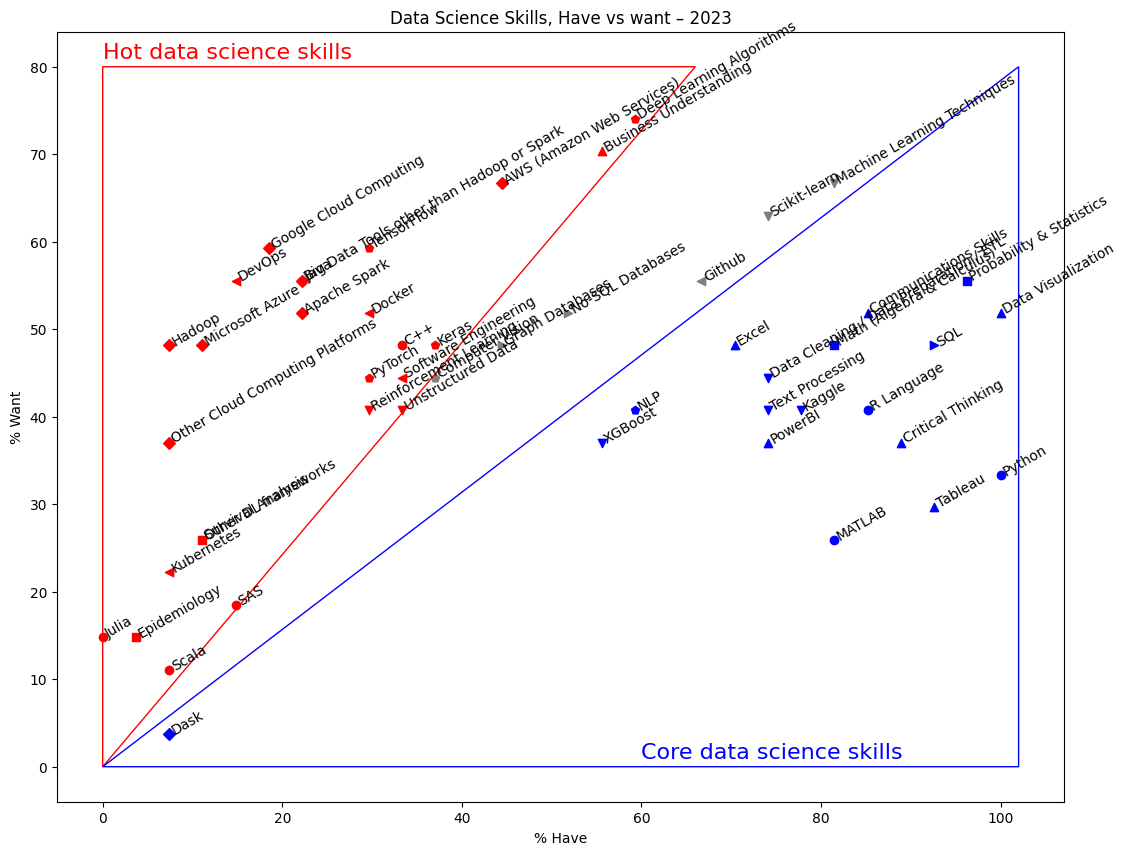

In [8]:
markers = ['o', 's', '^', 'v', '<', '>', 'D', 'p']    

import matplotlib.pyplot as plt


plt.figure(figsize=(13,10))
for skill in df.columns:
    want_by_have = results[f"{skill}_want"] / results[f"{skill}_have"]
    if want_by_have > 1.2:
        color = "red"
    elif want_by_have < 0.8:
        color = "blue"
    else:
        color = "grey"

    plt.scatter(results[f"{skill}_have"], results[f"{skill}_want"], label=skill, color=color, marker = markers[find_skill_number(categories, skill)])
    plt.annotate(skill, (results[f"{skill}_have"], results[f"{skill}_want"]), fontsize=10, rotation=30)

plt.fill([0, 66 , 0, 0], [0, 80, 80, 0], fill=None, edgecolor='red') 
plt.annotate("Hot data science skills", (0, 81), fontsize=16, color='red')
plt.fill([0, 102, 102, 0], [0, 80, 0, 0], fill=None, edgecolor='blue')
plt.annotate("Core data science skills", (60, 1), fontsize=16, color="blue")

plt.title("Data Science Skills, Have vs want – 2023")
plt.xlabel("% Have")
plt.ylabel("% Want")
plt.show()


In [9]:
max_haves = []
max_wants = []
for i, skills in enumerate(categories.values()):
    max_haves.append(0)
    max_wants.append(0)
    for skill in skills:
        max_haves[i] = max(max_haves[i], results[f"{skill}_have"])
        max_wants[i] = max(max_wants[i], results[f"{skill}_want"])
    
max_wants, max_haves

([55.55555555555556,
  55.55555555555556,
  70.37037037037037,
  66.66666666666666,
  55.55555555555556,
  51.85185185185185,
  66.66666666666666,
  74.07407407407408],
 [100.0,
  96.29629629629629,
  100.0,
  81.48148148148148,
  66.66666666666666,
  92.5925925925926,
  44.44444444444444,
  59.25925925925925])

In [10]:
import plotly.graph_objects as go

categories_names = list(categories.keys())

fig = go.Figure()


fig.add_trace(go.Scatterpolar(
      r= max_wants + [max_wants[0]],
      theta= categories_names + [categories_names[0]],
      fill="none",
      name='Max % want',
      line=dict(color='orange'),
))

fig.add_trace(go.Scatterpolar(
      r = max_haves + [max_haves[0]],
      theta = categories_names + [categories_names[0]],
      fill = "none",
      name = 'Max % have',
      line=dict(color='blue')
      
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 100]
    )),
  showlegend=True,
  title = "8 categories of modern data science skills, have vs want"
)

fig.show()


**Compare the results of the 2020 KDnuggets poll with those obtained for the class group.**

Students believe they have a bit biger lever of all skills and wanting of them than the KDnuggets poll participants. However, the populatrity of the categories is similar. For the students a bit more of them wants to learn buisness & communication. 

Looking at hot and core data science skills, students believe Tableau and MATLAB are core skills. Also more of them wants to learn excel. ML techniques, github and scikit learn, which are important for kdnuggets participants, are not so important for the students. Suprisingly, NLP is also treated as core skills, when in kdnuggets is a hot one, which not many people have. Deep learning algorithms remine hot with very high percentage of wants and most percentage of haves in both groups.

**What would you change about the study to get more insight?**
I'd analyse each category separately to know e.g. which Programming languages are the most popular. I'd also change the plot to show the average percentage of people wanting to learn a skill, not the max of them. I believe it would be more informative.

